<a href="https://colab.research.google.com/github/denverkim/DATA_MINING/blob/main/LAB3_CLASS_MON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# 파일 열기
traffic = pd.read_excel('/content/월별+교통사고+현황_20241007093357.xlsx')
traffic.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2019. 01,2019. 01.1,2019. 01.2,2019. 02,2019. 02.1,2019. 02.2,2019. 03,2019. 03.1,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,자치구별(1),자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),...,부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명)
1,합계,소계,2983,25,4134,2482,13,3368,3099,22,...,4550,3634,31,5053,3669,14,4933,3250,25,4504
2,NaN,종로구,87,1,125,66,1,84,87,2,...,143,104,-,139,100,-,126,100,-,142
3,NaN,중구,100,3,124,53,-,80,85,-,...,125,93,1,133,121,-,163,113,-,182
4,NaN,용산구,104,1,142,87,-,105,112,2,...,125,100,-,139,114,-,151,89,1,124


# 전처리



In [89]:
# 자치구별(1) 열삭제
traffic = traffic.drop('자치구별(1)', axis=1)
traffic.head()

,자치구별(2),2019. 01,2019. 01.1,2019. 01.2,2019. 02,2019. 02.1,2019. 02.2,2019. 03,2019. 03.1,2019. 03.2,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),...,부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명)
1,소계,2983,25,4134,2482,13,3368,3099,22,4223,...,4550,3634,31,5053,3669,14,4933,3250,25,4504
2,종로구,87,1,125,66,1,84,87,2,122,...,143,104,-,139,100,-,126,100,-,142
3,중구,100,3,124,53,-,80,85,-,113,...,125,93,1,133,121,-,163,113,-,182
4,용산구,104,1,142,87,-,105,112,2,163,...,125,100,-,139,114,-,151,89,1,124


In [90]:
# 행열전치
traffic = traffic.T
traffic.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2019. 01,발생건수 (건),2983,87,100,104,88,47,115,122,105,...,136,140,63,197,89,104,200,281,212,98
2019. 01.1,사망자수 (명),25,1,3,1,2,-,-,-,-,...,1,5,2,-,1,-,-,2,-,1
2019. 01.2,부상자수 (명),4134,125,124,142,119,70,148,153,151,...,179,189,81,268,118,148,293,412,319,115
2019. 02,발생건수 (건),2482,66,53,87,76,62,92,117,102,...,131,100,49,139,87,94,153,227,193,87


In [91]:
# 첫번째 행을 제목줄로 변환
traffic.columns = traffic.iloc[0]
traffic.head()

자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2019. 01,발생건수 (건),2983,87,100,104,88,47,115,122,105,...,136,140,63,197,89,104,200,281,212,98
2019. 01.1,사망자수 (명),25,1,3,1,2,-,-,-,-,...,1,5,2,-,1,-,-,2,-,1
2019. 01.2,부상자수 (명),4134,125,124,142,119,70,148,153,151,...,179,189,81,268,118,148,293,412,319,115
2019. 02,발생건수 (건),2482,66,53,87,76,62,92,117,102,...,131,100,49,139,87,94,153,227,193,87


In [92]:
# 첫번째행 삭제
traffic = traffic.drop(traffic.index[0])
traffic.head()

자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2019. 01,발생건수 (건),2983,87,100,104,88,47,115,122,105,...,136,140,63,197,89,104,200,281,212,98
2019. 01.1,사망자수 (명),25,1,3,1,2,-,-,-,-,...,1,5,2,-,1,-,-,2,-,1
2019. 01.2,부상자수 (명),4134,125,124,142,119,70,148,153,151,...,179,189,81,268,118,148,293,412,319,115
2019. 02,발생건수 (건),2482,66,53,87,76,62,92,117,102,...,131,100,49,139,87,94,153,227,193,87
2019. 02.1,사망자수 (명),13,1,-,-,-,-,-,-,2,...,-,2,-,2,-,-,-,3,2,-


In [93]:
# traffic 인텍스를 리셋
traffic = traffic.reset_index()
traffic.head()

자치구별(2),index,자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2019. 01,발생건수 (건),2983,87,100,104,88,47,115,122,...,136,140,63,197,89,104,200,281,212,98
1,2019. 01.1,사망자수 (명),25,1,3,1,2,-,-,-,...,1,5,2,-,1,-,-,2,-,1
2,2019. 01.2,부상자수 (명),4134,125,124,142,119,70,148,153,...,179,189,81,268,118,148,293,412,319,115
3,2019. 02,발생건수 (건),2482,66,53,87,76,62,92,117,...,131,100,49,139,87,94,153,227,193,87
4,2019. 02.1,사망자수 (명),13,1,-,-,-,-,-,-,...,-,2,-,2,-,-,-,3,2,-


In [94]:
# index를 1,1,1,2,2,2,3,3,3 등으로 변환
traffic['index'] = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12]
traffic.head()

자치구별(2),index,자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1,발생건수 (건),2983,87,100,104,88,47,115,122,...,136,140,63,197,89,104,200,281,212,98
1,1,사망자수 (명),25,1,3,1,2,-,-,-,...,1,5,2,-,1,-,-,2,-,1
2,1,부상자수 (명),4134,125,124,142,119,70,148,153,...,179,189,81,268,118,148,293,412,319,115
3,2,발생건수 (건),2482,66,53,87,76,62,92,117,...,131,100,49,139,87,94,153,227,193,87
4,2,사망자수 (명),13,1,-,-,-,-,-,-,...,-,2,-,2,-,-,-,3,2,-


In [95]:
# 자치구별(2)를 발생건수, 사망자수, 부상자수로 단위를 제거
traffic['자치구별(2)'] = ['발생건수', '사망자수', '부상자수']*12
traffic.head()

자치구별(2),index,자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1,발생건수,2983,87,100,104,88,47,115,122,...,136,140,63,197,89,104,200,281,212,98
1,1,사망자수,25,1,3,1,2,-,-,-,...,1,5,2,-,1,-,-,2,-,1
2,1,부상자수,4134,125,124,142,119,70,148,153,...,179,189,81,268,118,148,293,412,319,115
3,2,발생건수,2482,66,53,87,76,62,92,117,...,131,100,49,139,87,94,153,227,193,87
4,2,사망자수,13,1,-,-,-,-,-,-,...,-,2,-,2,-,-,-,3,2,-


In [96]:
# index는 달, 자치구별(2)는 사고종류로 컬럼명 변경
traffic = traffic.rename(columns={'index':'월', '자치구별(2)':'사고종류'})
traffic.head()

자치구별(2),월,사고종류,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1,발생건수,2983,87,100,104,88,47,115,122,...,136,140,63,197,89,104,200,281,212,98
1,1,사망자수,25,1,3,1,2,-,-,-,...,1,5,2,-,1,-,-,2,-,1
2,1,부상자수,4134,125,124,142,119,70,148,153,...,179,189,81,268,118,148,293,412,319,115
3,2,발생건수,2482,66,53,87,76,62,92,117,...,131,100,49,139,87,94,153,227,193,87
4,2,사망자수,13,1,-,-,-,-,-,-,...,-,2,-,2,-,-,-,3,2,-


In [97]:
# 한글처리 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [98]:
# 코랩 폰트 리스트
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts()
font_list

['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/sha

In [99]:
# 폰트이름 찾기
fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', size=9).get_name()

'NanumBarunGothic'

In [100]:
# 한글폰트 설정
plt.rc('font', family='NanumBarunGothic')

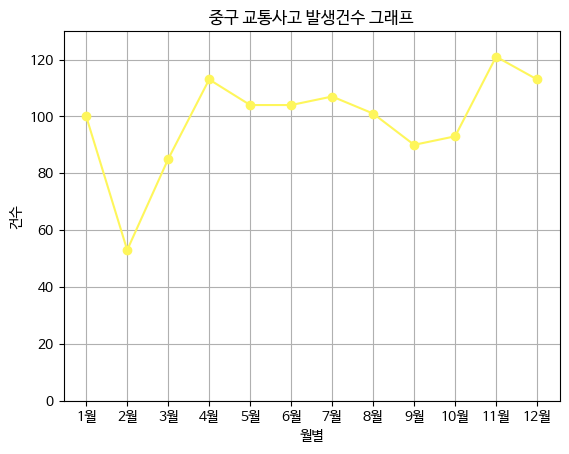

In [101]:
# 중구 발생건수 선그래프 그리기
junggu = traffic.중구[traffic['사고종류'] == '발생건수']
plt.plot(junggu, color='#fef65b', marker='o')
plt.xticks(range(0,34,3), ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
plt.grid()
plt.title('중구 교통사고 발생건수 그래프')
plt.xlabel('월별')
plt.ylabel('건수')
plt.ylim(0, 130)
plt.show()

# 산점도

In [102]:
# 파일 읽기
traffic2 = pd.read_excel('/content/월별+교통사고+현황_20241007111117.xlsx')
traffic2.head()

,자치구별(1),자치구별(2),2009. 01,2009. 01.1,2009. 01.2,2009. 02,2009. 02.1,2009. 02.2,2009. 03,2009. 03.1,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,자치구별(1),자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),...,부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명)
1,합계,소계,3111,52,4839,3073,47,4531,3578,41,...,4550,3634,31,5053,3669,14,4933,3250,25,4504
2,NaN,종로구,100,4,150,107,1,156,124,-,...,143,104,-,139,100,-,126,100,-,142
3,NaN,중구,98,-,156,91,-,104,116,1,...,125,93,1,133,121,-,163,113,-,182
4,NaN,용산구,94,3,135,92,1,131,104,-,...,125,100,-,139,114,-,151,89,1,124


In [103]:
# 자치구별(1) 열 삭제
traffic2 = traffic2.drop('자치구별(1)', axis=1)
traffic2.head()

,자치구별(2),2009. 01,2009. 01.1,2009. 01.2,2009. 02,2009. 02.1,2009. 02.2,2009. 03,2009. 03.1,2009. 03.2,...,2019. 09.2,2019. 10,2019. 10.1,2019. 10.2,2019. 11,2019. 11.1,2019. 11.2,2019. 12,2019. 12.1,2019. 12.2
0,자치구별(2),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),...,부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명),발생건수 (건),사망자수 (명),부상자수 (명)
1,소계,3111,52,4839,3073,47,4531,3578,41,5132,...,4550,3634,31,5053,3669,14,4933,3250,25,4504
2,종로구,100,4,150,107,1,156,124,-,188,...,143,104,-,139,100,-,126,100,-,142
3,중구,98,-,156,91,-,104,116,1,149,...,125,93,1,133,121,-,163,113,-,182
4,용산구,94,3,135,92,1,131,104,-,150,...,125,100,-,139,114,-,151,89,1,124


In [104]:
# 행열전치
traffic2 = traffic2.T
traffic2.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2009. 01,발생건수 (건),3111,100,98,94,73,141,108,154,128,...,151,109,69,169,66,159,155,288,206,120
2009. 01.1,사망자수 (명),52,4,-,3,2,1,4,2,2,...,-,2,1,2,1,3,3,3,2,4
2009. 01.2,부상자수 (명),4839,150,156,135,98,230,140,293,180,...,213,182,131,268,106,248,241,443,327,169
2009. 02,발생건수 (건),3073,107,91,92,86,104,116,143,127,...,132,115,84,168,60,151,169,263,201,118


In [105]:
# 0행을 제목줄로 변환
traffic2.columns = traffic2.iloc[0]
traffic2.head()

자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2009. 01,발생건수 (건),3111,100,98,94,73,141,108,154,128,...,151,109,69,169,66,159,155,288,206,120
2009. 01.1,사망자수 (명),52,4,-,3,2,1,4,2,2,...,-,2,1,2,1,3,3,3,2,4
2009. 01.2,부상자수 (명),4839,150,156,135,98,230,140,293,180,...,213,182,131,268,106,248,241,443,327,169
2009. 02,발생건수 (건),3073,107,91,92,86,104,116,143,127,...,132,115,84,168,60,151,169,263,201,118


In [106]:
# 0행 제거
traffic2 = traffic2.drop(traffic2.index[0])
traffic2.head()

자치구별(2),자치구별(2),소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2009. 01,발생건수 (건),3111,100,98,94,73,141,108,154,128,...,151,109,69,169,66,159,155,288,206,120
2009. 01.1,사망자수 (명),52,4,-,3,2,1,4,2,2,...,-,2,1,2,1,3,3,3,2,4
2009. 01.2,부상자수 (명),4839,150,156,135,98,230,140,293,180,...,213,182,131,268,106,248,241,443,327,169
2009. 02,발생건수 (건),3073,107,91,92,86,104,116,143,127,...,132,115,84,168,60,151,169,263,201,118
2009. 02.1,사망자수 (명),47,1,-,1,1,2,5,1,1,...,-,2,1,6,1,1,4,4,1,-


In [107]:
# 자치구별(2) 컬럼명을 사고종류로 변환
traffic2 = traffic2.rename(columns={'자치구별(2)':'사고종류'})
traffic2.head()

자치구별(2),사고종류,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2009. 01,발생건수 (건),3111,100,98,94,73,141,108,154,128,...,151,109,69,169,66,159,155,288,206,120
2009. 01.1,사망자수 (명),52,4,-,3,2,1,4,2,2,...,-,2,1,2,1,3,3,3,2,4
2009. 01.2,부상자수 (명),4839,150,156,135,98,230,140,293,180,...,213,182,131,268,106,248,241,443,327,169
2009. 02,발생건수 (건),3073,107,91,92,86,104,116,143,127,...,132,115,84,168,60,151,169,263,201,118
2009. 02.1,사망자수 (명),47,1,-,1,1,2,5,1,1,...,-,2,1,6,1,1,4,4,1,-


In [108]:
traffic2.shape

(396, 27)

In [109]:
# 사고종류 데이터 정리
traffic2.사고종류 = ['발생건수', '사망자수', '부상자수']*132
traffic2.head()

자치구별(2),사고종류,소계,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2009. 01,발생건수,3111,100,98,94,73,141,108,154,128,...,151,109,69,169,66,159,155,288,206,120
2009. 01.1,사망자수,52,4,-,3,2,1,4,2,2,...,-,2,1,2,1,3,3,3,2,4
2009. 01.2,부상자수,4839,150,156,135,98,230,140,293,180,...,213,182,131,268,106,248,241,443,327,169
2009. 02,발생건수,3073,107,91,92,86,104,116,143,127,...,132,115,84,168,60,151,169,263,201,118
2009. 02.1,사망자수,47,1,-,1,1,2,5,1,1,...,-,2,1,6,1,1,4,4,1,-


In [110]:
# 소계이면서 발생건수 추출
occurred = traffic2.소계[traffic2.사고종류 == '발생건수']
occurred.head()

,소계
2009. 01,3111
2009. 02,3073
2009. 03,3578
2009. 04,3576
2009. 05,3814


In [111]:
# 소계이면서 부상자수 추출
injured = traffic2.소계[traffic2.사고종류 == '부상자수']
injured.head()

,소계
2009. 01.2,4839
2009. 02.2,4531
2009. 03.2,5132
2009. 04.2,5047
2009. 05.2,5424


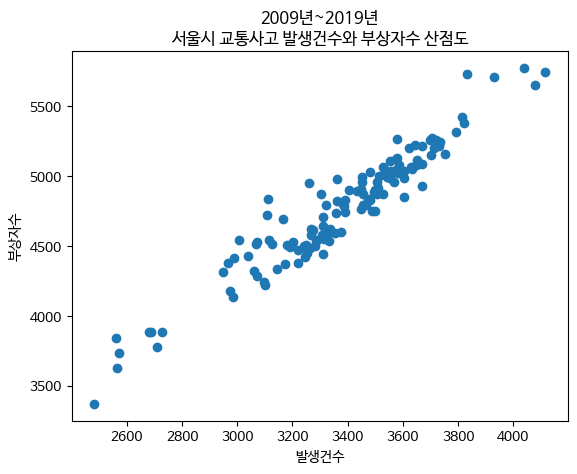

In [113]:
plt.scatter(occurred, injured)
plt.title('2009년~2019년\n서울시 교통사고 발생건수와 부상자수 산점도')
plt.xlabel('발생건수')
plt.ylabel('부상자수')
plt.show()